In [4]:
# Baixar os devidos arquivos
!wget -c https://raw.githubusercontent.com/arthurwduart/GOES/main/utils/utilities_goes19.py
!wget -c https://raw.githubusercontent.com/arthurwduart/GOES/main/utils/ir.cpt

--2025-08-16 00:31:16--  https://raw.githubusercontent.com/arthurwduart/GOES/main/utils/utilities_goes19.py
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Conectando-se a raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 17330 (17K) [text/plain]
Salvando em: ‘utilities_goes19.py’

utilities_goes19.py 100%[===================>]  16,92K  --.-KB/s    em 0,003s  

2025-08-16 00:31:17 (5,05 MB/s) - ‘utilities_goes19.py’ salvo [17330/17330]

--2025-08-16 00:31:18--  https://raw.githubusercontent.com/arthurwduart/GOES/main/utils/ir.cpt
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Conectando-se a raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta..

File Samples//OR_ABI-L2-CMIPF-M6C13_G19_s20251372340222_e20251372349542_c20251372349586.nc exists


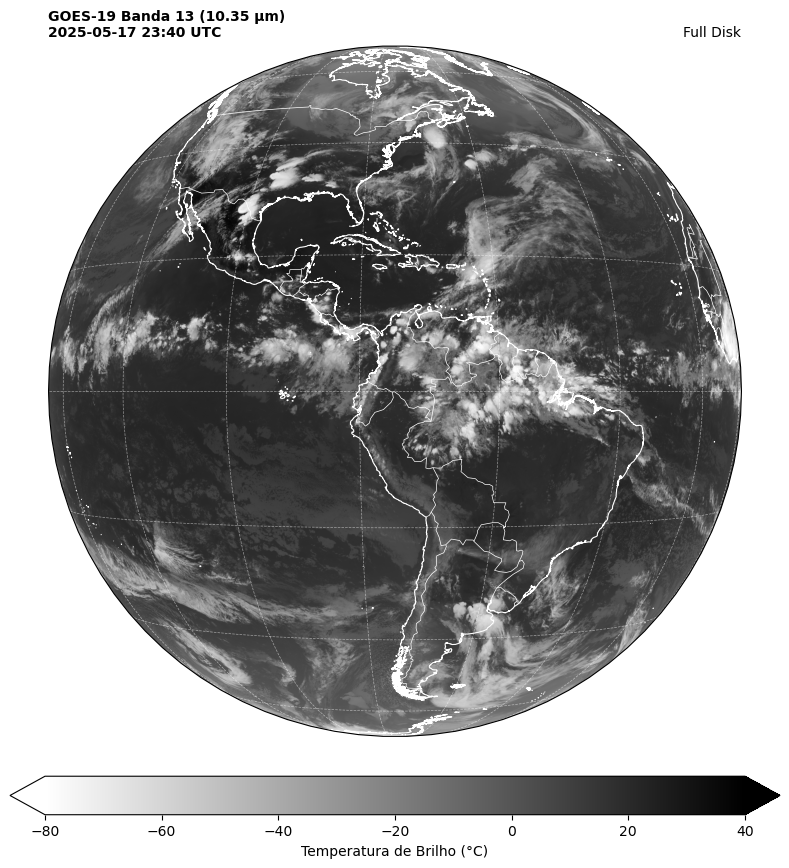

In [7]:
#========================================================================================================================#
#                                          IMPORTAÇÃO DAS BIBLIOTECAS
#========================================================================================================================#
import xarray as xr
import matplotlib.pyplot as plt
import cartopy, cartopy.crs as ccrs
from datetime import datetime
from utilities_goes19 import download_CMI
import os

#========================================================================================================================#
#                                        CRIA DIRETÓRIO DE ENTRADA E SAÍDA
#========================================================================================================================#
# Diretórios
input = "Samples/"; os.makedirs(input, exist_ok=True)
output = "Output/"; os.makedirs(output, exist_ok=True)

#========================================================================================================================#
#                                               DOWNLOAD DO ARQUIVO
#========================================================================================================================#
# data de processamento
yyyymmddhhmn = '202505172340'

# canal do ABI
band = '13'

# download do arquivo (CMI: "Cloud and Moisture Imagery" Product)
file_name = download_CMI(yyyymmddhhmn, band, input)

# caminho do arquivo que foi baixado
path = f'{input}/{file_name}.nc'

#========================================================================================================================#
#                                               LEITURA DO ARQUIVO
#========================================================================================================================#
# abre a imagem
data = xr.open_dataset(path)

#========================================================================================================================#
#                                                 PLOTA A IMAGEM
#========================================================================================================================#
# tamanho da figura (largura x altura em polegadas)
plt.figure(figsize=(10,10))

# usa a projeção geoestacionária do cartopy
# para o GOES-16: longitude central: -75.0 / altura do satellite: 35786023.0
# a extensão do Full Disk: (metade dos pixels full disk) X (tamanho do pixel em radianos) X (altura do satélite em metros) => 2712 * 0.000056 * 35786023.0 = 5434894.67527
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=-75.0, satellite_height=35786023.0))
img_extent = (-5434894.67527, 5434894.67527, -5434894.67527, 5434894.67527)

# linhas costeiras, bordas e linhas de grade do mapa
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
ax.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=0.5)

# escala de cores
colormap = "gray_r" # escala de cores na ordem reversa - branco para preto para o canal do IR

# plota imagem
img = ax.imshow(data['CMI'] - 273.15, origin='upper', vmin=-80, vmax=40, extent=img_extent, cmap=colormap)

# barra de cores
plt.colorbar(img, label='Temperatura de Brilho (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)

# leitura da data/horário do arquivo NetCDF como uma string
date = (datetime.strptime(data.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')).strftime('%Y-%m-%d %H:%M UTC')

# título da figura
plt.title(f'GOES-19 Banda 13 (10.35 µm)\n{date}', fontweight='bold', fontsize=10, loc='left')
plt.title('Full Disk', fontsize=10, loc='right')

# salva figura
#plt.savefig(f'{output}/script_1_{date.replace(" ", "_")}.jpg')

# mostra figura na tela
plt.show()
     

File Samples//OR_ABI-L2-CMIPF-M6C13_G19_s20251380130202_e20251380139521_c20251380139554.nc exists


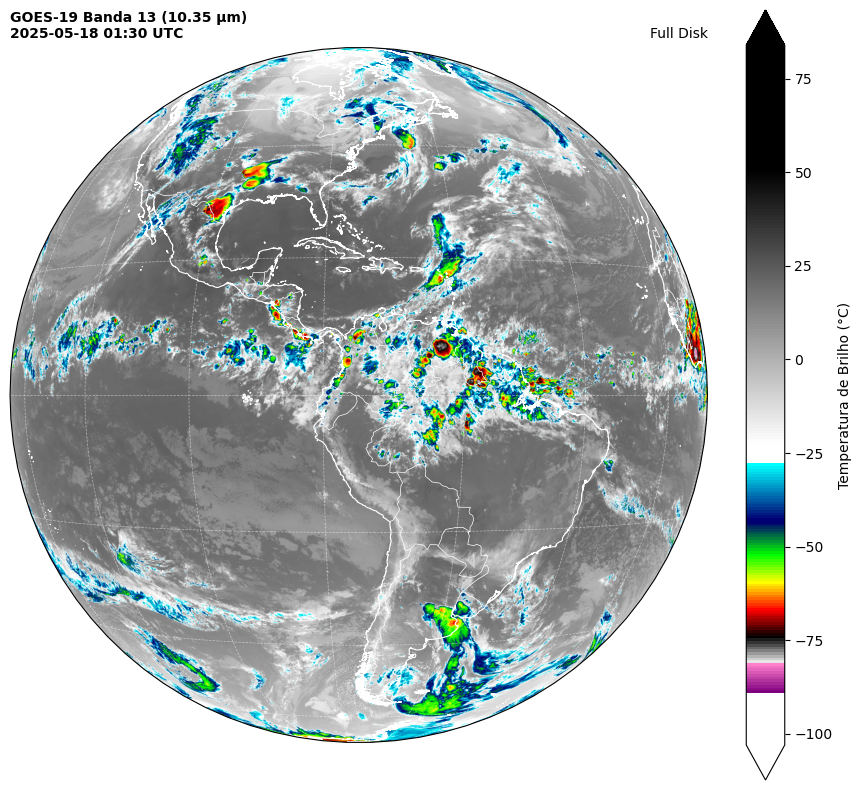

CPU times: user 2.57 s, sys: 3.93 s, total: 6.5 s
Wall time: 7.07 s


In [51]:
%%time
#========================================================================================================================#
#                                          IMPORTAÇÃO DAS BIBLIOTECAS
#========================================================================================================================#
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy, cartopy.crs as ccrs
from datetime import datetime
from utilities_goes19 import download_CMI, remap, loadCPT
import os

#========================================================================================================================#
#                                        CRIA DIRETÓRIO DE ENTRADA E SAÍDA
#========================================================================================================================#
# Diretórios
input = "Samples/"; os.makedirs(input, exist_ok=True)
output = "Output/"; os.makedirs(output, exist_ok=True)

#========================================================================================================================#
#                                               DOWNLOAD DO ARQUIVO
#========================================================================================================================#
# data de processamento
yyyymmddhhmn = '202505180130'

# canal do ABI
band = '13'

# download do arquivo (CMI: "Cloud and Moisture Imagery" Product)
file_name = download_CMI(yyyymmddhhmn, band, input)

# caminho do arquivo que foi baixado
path = f'{input}/{file_name}.nc'

#========================================================================================================================#
#                                               LEITURA DO ARQUIVO
#========================================================================================================================#
# abre a imagem
data = xr.open_dataset(path)

#========================================================================================================================#
#                                                 PLOTA A IMAGEM
#========================================================================================================================#
# tamanho da figura (largura x altura em polegadas)
plt.figure(figsize=(10,10))

# usa a projeção geoestacionária do cartopy
# para o GOES-16: longitude central: -75.0 / altura do satellite: 35786023.0
# a extensão do Full Disk: (metade dos pixels full disk) X (tamanho do pixel em radianos) X (altura do satélite em metros) => 2712 * 0.000056 * 35786023.0 = 5434894.67527
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=-75.0, satellite_height=35786023.0))
img_extent = (-5434894.67527, 5434894.67527, -5434894.67527, 5434894.67527)

# linhas costeiras, bordas e linhas de grade do mapa
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
ax.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=0.5)

# converte o arquivo CPT para ser usado em Python
cpt = loadCPT('ir.cpt')
colormap = cm.colors.LinearSegmentedColormap('cpt', cpt)

# plota imagem
img = ax.imshow(data['CMI'] - 273.15, origin='upper', vmin=-103.0, vmax=84, extent=img_extent, cmap=colormap)

# barra de cores
plt.colorbar(img, label='Temperatura de Brilho (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

# leitura da data/horário do arquivo NetCDF como uma string
date = (datetime.strptime(data.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')).strftime('%Y-%m-%d %H:%M UTC')

# título da figura
plt.title(f'GOES-19 Banda 13 (10.35 µm)\n{date}', fontweight='bold', fontsize=10, loc='left')
plt.title('Full Disk', fontsize=10, loc='right')

# salva figura
#plt.savefig(f'{output}/script_2_{date.replace(" ", "_")}.jpg')

# mostra figura na tela
plt.show()

File Samples//OR_ABI-L2-CMIPF-M6C13_G19_s20251380130202_e20251380139521_c20251380139554.nc exists
Remapping...
Remap finished! Time: 0.08 seconds


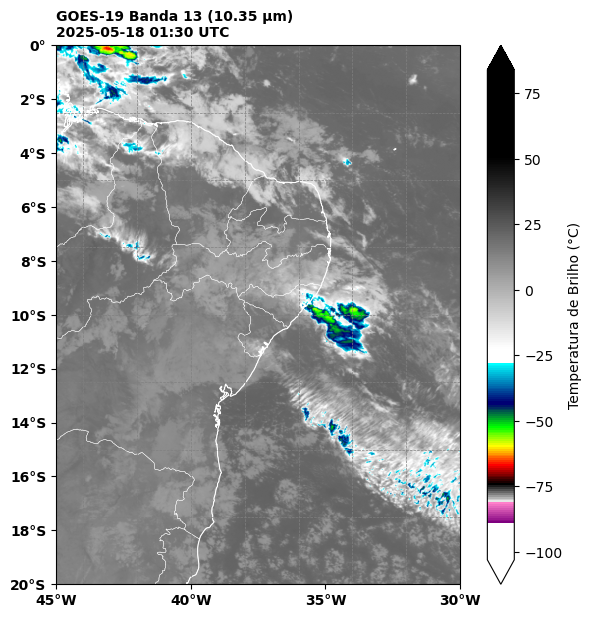

CPU times: user 755 ms, sys: 26 ms, total: 781 ms
Wall time: 1.19 s


In [65]:
%%time
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from datetime import datetime
from utilities_goes19 import download_CMI, remap, loadCPT
import os
import numpy as np

# Diretórios
input_dir = "Samples/"; os.makedirs(input_dir, exist_ok=True)
output_dir = "Output/"; os.makedirs(output_dir, exist_ok=True)

# Arquivo
yyyymmddhhmn = '202505180130'  # UTC
band = '13'
file_name = download_CMI(yyyymmddhhmn, band, input_dir)
path = f'{input_dir}/{file_name}.nc'

# Dados
data = xr.open_dataset(path)

# Área desejada
extent = [-45.0, -20.0, -30.0, 0.0]

# Reamostragem
grid = remap(path, 'CMI', extent, resolution=2)
temp_brilho = grid.ReadAsArray() - 273.15

# Extent real do remap
gt = grid.GetGeoTransform()
xmin = gt[0]; ymax = gt[3]
xres = gt[1]; yres = gt[5]
xmax = xmin + (grid.RasterXSize * xres)
ymin = ymax + (grid.RasterYSize * yres)
extent_remap = [xmin, xmax, ymin, ymax]

# Plot
plt.figure(figsize=(7, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent_remap, crs=ccrs.PlateCarree())

# Costas e limites
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cfeature.BORDERS, edgecolor='white', linewidth=0.5)
ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='white', linewidth=0.3)

# Grade
gl = ax.gridlines(color='gray', linestyle='--', linewidth=0.5, draw_labels=False)

# === Ticks fixos a cada 5° ===
xticks = np.arange(-45, -29, 5)   # longitude de -45 a -30
yticks = np.arange(-20, 1, 2)     # latitude de -20 a 0
ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_yticks(yticks, crs=ccrs.PlateCarree())

# Formatadores bonitos (45°W, 10°S etc.)
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax.yaxis.set_major_formatter(LatitudeFormatter())

# Deixa ticks em negrito
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(10)
    label.set_fontweight("bold")
    label.set_color("black")

# Colormap
cpt = loadCPT('ir.cpt')
colormap = cm.colors.LinearSegmentedColormap('cpt', cpt)

img = ax.imshow(temp_brilho, origin='upper', extent=extent_remap,
                cmap=colormap, vmin=-103, vmax=84)

# Barra de cores
plt.colorbar(img, label='Temperatura de Brilho (°C)', extend='both',
             orientation='vertical', pad=0.05, fraction=0.05)

# Título
date = (datetime.strptime(data.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')
        ).strftime('%Y-%m-%d %H:%M UTC')
plt.title(f'GOES-19 Banda 13 (10.35 µm)\n{date}', fontsize=10,
          fontweight='bold', loc='left')

plt.show()


Remapping...
Remap finished! Time: 0.1 seconds
Remapping...
Remap finished! Time: 0.1 seconds
File Samples//OR_ABI-L2-CMIPF-M6C13_G19_s20251372340222_e20251372349542_c20251372349586.nc exists
Remapping...
Remap finished! Time: 0.1 seconds
File Samples//OR_ABI-L2-CMIPF-M6C13_G19_s20251380000222_e20251380009542_c20251380009579.nc exists
Remapping...
Remap finished! Time: 0.1 seconds
File Samples//OR_ABI-L2-CMIPF-M6C13_G19_s20251380100202_e20251380109522_c20251380109578.nc exists
Remapping...
Remap finished! Time: 0.1 seconds
File Samples//OR_ABI-L2-CMIPF-M6C13_G19_s20251380130202_e20251380139521_c20251380139554.nc exists
Remapping...
Remap finished! Time: 0.1 seconds
Remapping...
Remap finished! Time: 0.1 seconds
File Samples//OR_ABI-L2-CMIPF-M6C13_G19_s20251380200202_e20251380209521_c20251380209570.nc exists
Remapping...
Remap finished! Time: 0.1 seconds


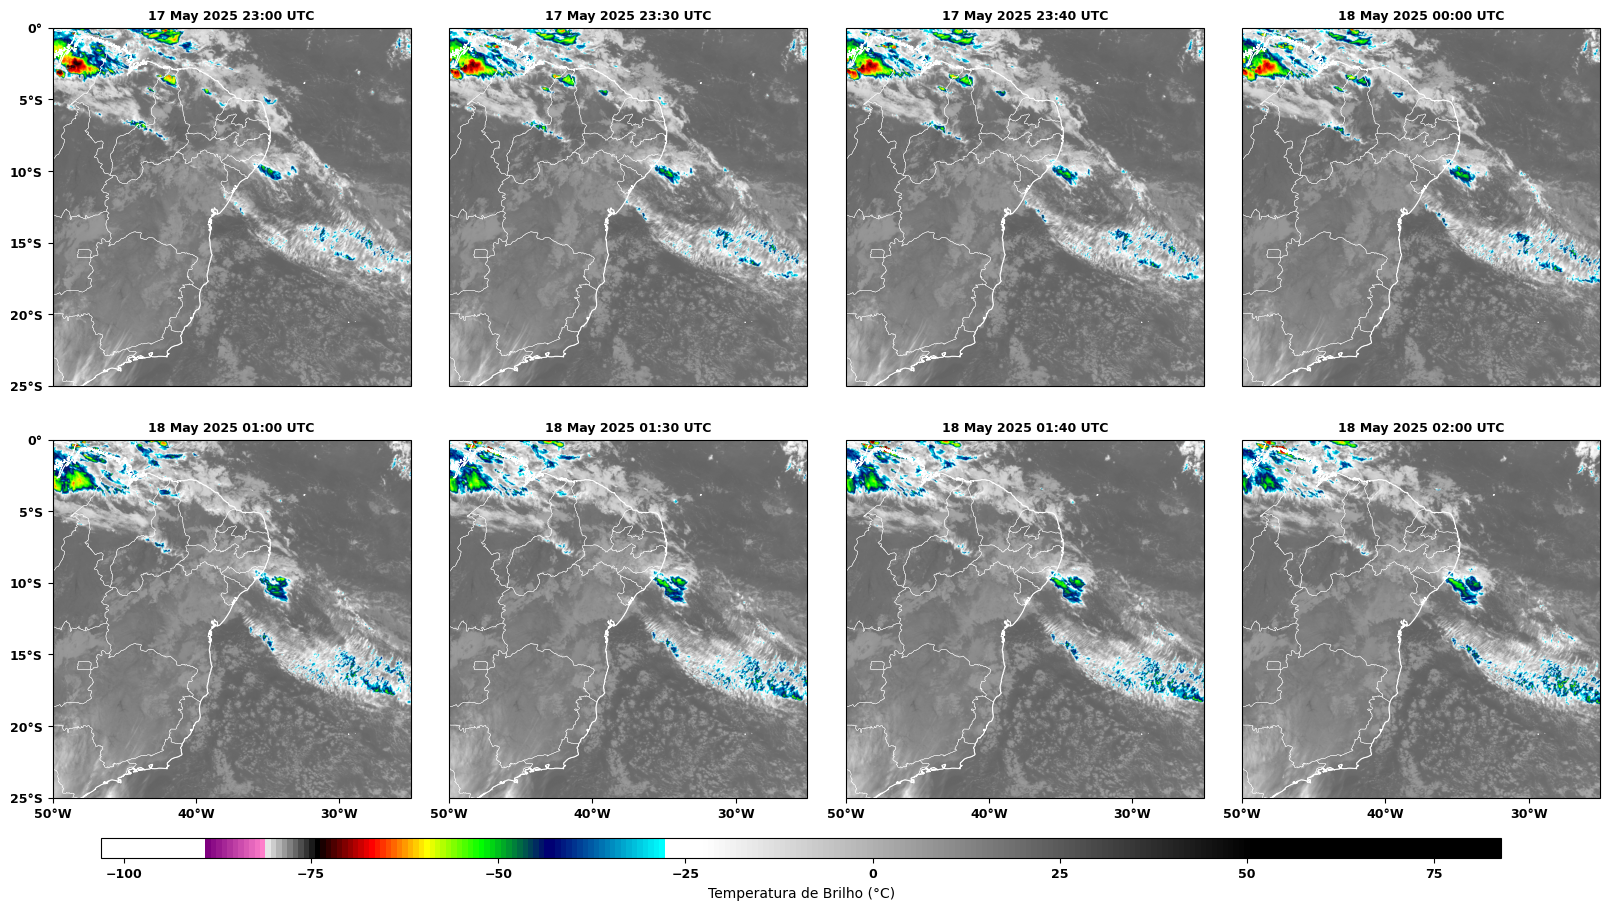

In [80]:
# =====================================
# Painel 2x4 - GOES-19 Banda 13 (IR)
# =====================================
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from datetime import datetime
import numpy as np
import os, string
from utilities_goes19 import download_CMI, remap, loadCPT

# Diretórios
input_dir = "Samples/"; os.makedirs(input_dir, exist_ok=True)
output_dir = "Output/"; os.makedirs(output_dir, exist_ok=True)

# Área de plotagem
extent = [-50, -25, -25, 0]   # lon_min, lat_min, lon_max, lat_max
band = "13"

# Datas/horários
valid_times = [
    "202505172300", "202505172330", "202505172340", "202505180000",
    "202505180100", "202505180130", "202505180140", "202505180200"
]

# Paleta CPT (IR)
cpt = loadCPT("ir.cpt")
colormap_ir = cm.colors.LinearSegmentedColormap("cpt", cpt)

# Figura 2x4
fig, axs = plt.subplots(2, 4, figsize=(20, 10), subplot_kw={"projection": ccrs.PlateCarree()})
axs = axs.flatten()
letters = list(string.ascii_lowercase)

for i, yyyymmddhhmn in enumerate(valid_times):
    ax = axs[i]

    # Base do mapa
    ax.set_extent(extent, crs=ccrs.PlateCarree())
    ax.coastlines("10m", color="white", linewidth=0.8)
    ax.add_feature(cfeature.BORDERS, edgecolor="white", linewidth=0.5)
    ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="white", linewidth=0.3)

    # Imagem GOES-19
    file_name = download_CMI(yyyymmddhhmn, band, input_dir)
    goes = xr.open_dataset(f"{input_dir}/{file_name}.nc")
    grid = remap(f"{input_dir}/{file_name}.nc", "CMI", extent, resolution=2)
    temp_brilho = grid.ReadAsArray() - 273.15

    # Extent real do raster
    gt = grid.GetGeoTransform()
    xmin = gt[0]; ymax = gt[3]
    xres = gt[1]; yres = gt[5]
    xmax = xmin + (grid.RasterXSize * xres)
    ymin = ymax + (grid.RasterYSize * yres)
    extent_remap = [xmin, xmax, ymin, ymax]

    im = ax.imshow(temp_brilho, origin="upper", extent=extent_remap,
                   cmap=colormap_ir, vmin=-103, vmax=84)

    # Subplot label
    ax.text(0.01, 1.05, f"{letters[i]})", transform=ax.transAxes,
            fontsize=12, fontweight="bold", va="top", ha="left", color="white")

    # Data/hora título
    dt = datetime.strptime(goes.time_coverage_start, "%Y-%m-%dT%H:%M:%S.%fZ")
    ax.set_title(dt.strftime("%d %b %Y %H:%M UTC"), fontsize=9, fontweight="bold")

    # === Configuração de ticks ===
    xticks = np.arange(-50, -24, 10) 
    yticks = np.arange(-25, 1, 5)    

    # Apenas na primeira coluna → mostrar latitudes
    if i % 4 == 0:
        ax.set_yticks(yticks, crs=ccrs.PlateCarree())
        ax.yaxis.set_major_formatter(LatitudeFormatter())
        for label in ax.get_yticklabels():
            label.set_fontsize(9)
            label.set_fontweight("bold")
            label.set_color("black")
    else:
        ax.set_yticks([])

    # Apenas na última linha → mostrar longitudes
    if i >= 4:
        ax.set_xticks(xticks, crs=ccrs.PlateCarree())
        ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
        for label in ax.get_xticklabels():
            label.set_fontsize(9)
            label.set_fontweight("bold")
            label.set_color("black")
    else:
        ax.set_xticks([])

# Colorbar única
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02])
cb = fig.colorbar(im, cax=cbar_ax, orientation="horizontal", label="Temperatura de Brilho (°C)")
cb.ax.tick_params(labelsize=9)
for label in cb.ax.get_xticklabels():
    label.set_fontweight("bold")

plt.subplots_adjust(hspace=0.15, wspace=0.1)
#plt.savefig(f"{output_dir}/GOES19_B13_Painel.png", dpi=300, bbox_inches="tight")
plt.show()
